In [1]:
import numpy as np
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot
from keras.preprocessing import sequence

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.models import load_model

In [4]:
import matplotlib.pyplot as plt

In [5]:
from keras.layers import Dropout

## 1. Analisis de Sentimientos usando RNN
---

**Cargar Dataset:** 

In [6]:
np.random.seed(3)

In [7]:
#np.random.seed(3)
#(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, maxlen=500,seed=15)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000,seed=15)

In [8]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [9]:
print("Datos de Entrenamiento: ")
print(X_train.shape)
print(X_test.shape)

Datos de Entrenamiento: 
(25000, 500)
(25000, 500)


**(g) Use Dropout para entrenar la LSTM. ¿El Dropout mejora el desempeño de la red? Señale cuales podrían ser las causas del comportamiento observado.**

Con el fin de poder realizar las pruebas de distintas configuraciones con dropout se modifico la funcion para crear los modelos agregando esta al modelo general:

In [10]:
def createModelo(_top_words, _embedding_vector_length,_input_length,_lstm):
    model = Sequential()
    model.add(Embedding(_top_words, _embedding_vector_length, input_length=_input_length))
    model.add(Dropout(0.2))
    model.add(LSTM(_lstm))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Crear Modelos los 4 modelos TopWords = [1000-3000-6000-9000]

In [11]:
#Caso 1 TopWords = 1000
top_words = 1000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_1000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_1000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_1000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Caso 2 TopWords = 3000
top_words = 3000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_3000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_3000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_3000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           96000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Caso 3 TopWords = 6000
top_words = 6000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_6000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_6000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_6000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           192000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Caso 4 TopWords = 9000
top_words = 9000
embedding_vector_length = 32 #mejor resultado expereimental
input_length=500
lstm = 100
model_9000 = createModelo(top_words, embedding_vector_length,input_length,lstm)
model_9000.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_9000.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           288000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 341,301
Trainable params: 341,301
Non-trainable params: 0
_________________________________________________________________


### Fit Modelos

In [15]:
%%time
history_caso_1000 = model_1000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_1000.save('modelosF/top_word_1000_g.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 348s - loss: 0.5082 - acc: 0.7508 - val_loss: 0.3753 - val_acc: 0.8430

In [16]:
%%time
history_caso_3000 = model_3000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_3000.save('modelosF/top_word_3000_g.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 332s - loss: 0.5210 - acc: 0.7394 - val_loss: 0.3751 - val_acc: 0.8396

In [17]:
%%time
history_caso_6000 = model_6000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_6000.save('modelosF/top_word_6000_g.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 335s - loss: 0.4708 - acc: 0.7710 - val_loss: 0.3346 - val_acc: 0.8577

In [18]:
%%time
history_caso_9000 = model_9000.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_9000.save('modelosF/top_word_9000_g.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 333s - loss: 0.5274 - acc: 0.7226 - val_loss: 0.3531 - val_acc: 0.8502

### Evaluar modelos
---

In [6]:
model_1000 = load_model('modelosF/top_word_1000_g.h5')
model_3000 = load_model('modelosF/top_word_3000_g.h5')
model_6000 = load_model('modelosF/top_word_6000_g.h5')
model_9000 = load_model('modelosF/top_word_9000_g.h5')

In [19]:
scores_1000 = model_1000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 1 top_word_1000 = : %.2f%%" % (scores_1000[1]*100))
print("Loss del modelo Caso 1: %.2f%%" % (scores_1000[0]*100))

25000/25000 [==============================] - 117s     

In [20]:
scores_3000 = model_3000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 2 top_word_3000 = %.2f%%" % (scores_3000[1]*100))
print("Loss del modelo Caso 2: %.2f%%" % (scores_3000[0]*100))

25000/25000 [==============================] - 116s     

In [21]:
scores_6000 = model_6000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 3 top_word_6000 = %.2f%%" % (scores_6000[1]*100))
print("Loss del modelo Caso 3: %.2f%%" % (scores_6000[0]*100))

25000/25000 [==============================] - 116s     

In [34]:
scores_9000 = model_9000.evaluate(X_test, y_test)
print("")
print("Accuracy del Caso 4 top_word_9000 = %.2f%%" % (scores_9000[1]*100))
print("Loss del modelo Caso 4: %.2f%%" % (scores_9000[0]*100))

25000/25000 [==============================] - 116s     

### Comentarios
---

<h3 align = 'center'> Variables </h3>

|embedding_length | top_words | input_length | Total params | time_traning |Accuracy_Sin_Dropout|Accuracy_con_Dropout
| :-: | :-: | :-: | :-: | :-: |:-: |:-: |:-: |
|32|1000|500| 85,301| 17min 7s| 74.64%|74.64%|
|32|3000|500| 149,301| 16min 35s| 86.37%|86.29%|
|32|6000|500| 245,301| 16min 47s| 88.00%|82.77%|
|32|9000|500| 341,301| 16min 40s| 85.99%|85.55%|

Como podemos ver se confirmar algo que teoricamente es conocido, las redes neuronales recurrentes, como LSTM, generalmente tienen el problema del overfitting. Y como sabemos una de las tenicas mas usadas para salir de este problema es usando usando Dropout, pero el Dropout standart perturba la conexiones recurrentes de la red, lo que provoca problema en la LSTM pues le dificulta aprender a almacenar secuencias en periodos amplios de tiempo. 

Lo anterior lo podemos confirmar de forma empirica, pues todas las tasas de Accuracy disminuyeron en todas las configuraciones de la experiencia.

### Graficos de curvas
---

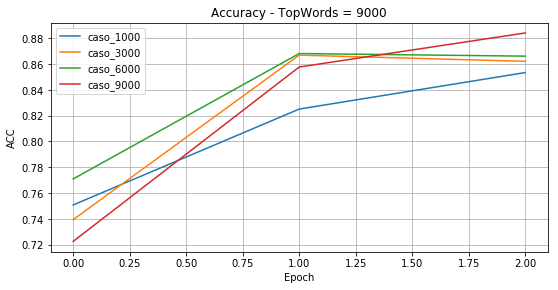

In [36]:
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(history_caso_1000.history['acc'])  
plt.title('Accuracy - TopWords = 1000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['caso_1000', 'caso_3000', 'caso_6000', 'caso_9000'], loc='upper left')
plt.grid(True)


######
plt.subplot(4, 2, 1)
plt.plot(history_caso_3000.history['acc'])  
plt.title('Accuracy - TopWords = 3000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['caso_1000', 'caso_3000', 'caso_6000', 'caso_9000'], loc='upper left')
plt.grid(True)

#######

plt.subplot(4, 2, 1)
plt.plot(history_caso_6000.history['acc'])  
plt.title('Accuracy - TopWords = 6000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['caso_1000', 'caso_3000', 'caso_6000', 'caso_9000'], loc='upper left')
plt.grid(True)

####

plt.subplot(4, 2, 1)
plt.plot(history_caso_9000.history['acc'])  
plt.title('Accuracy - TopWords = 9000')  
plt.ylabel('ACC')  
plt.xlabel('Epoch')  
plt.legend(['caso_1000', 'caso_3000', 'caso_6000', 'caso_9000'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

**(h) Proponga una modificacion del modelo estudiado hasta el momento que mejore la capacidad predictiva del modelo.**

La propuestas vienen de aplicar los resultados experimentales, por ejemplo en la actividad (E) se obtuvieron mejores resultados con una dimensionalidad del embedding 64. Asi tambien la actividad (F) los mejores resultados de la experiencia fueron con 6000 palabras top. 

Ahora bien, como es sabido (por teoria y de forma experimental en el problema anterior disminuyo el accurasy) el uso del dropout en redes recurrentes es un facor de cuidado, por lo cual se probaran los dos enfoques con y sin dropout.

In [39]:
#Propuesta 1 sin Dropout
top_words = 6000
embedding_vector_length = 64 
lstm = 100

model_propuesto_1 = Sequential()
model_propuesto_1.add(Embedding(top_words, embedding_vector_length, input_length=500))
model_propuesto_1.add(LSTM(lstm))
model_propuesto_1.add(Dense(1, activation='sigmoid'))
model_propuesto_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_propuesto_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 64)           384000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 450,101
Trainable params: 450,101
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Propuesta 2 con dropout
top_words = 6000
embedding_vector_length = 64 
input_length=500
lstm = 100

model_propuesto_2  = Sequential()
model_propuesto_2 .add(Embedding(top_words, embedding_vector_length, input_length=500))
model_propuesto_2 .add(Dropout(0.2))
model_propuesto_2 .add(LSTM(lstm))
model_propuesto_2 .add(Dropout(0.2))
model_propuesto_2 .add(Dense(1, activation='sigmoid'))
model_propuesto_2 .compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #relacionado la clasificacion binaria
model_propuesto_2 .summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 64)           384000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 500, 64)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 450,101
Trainable params: 450,101
Non-trainable params: 0
_________________________________________________________________


In [41]:
%%time
history_model_propuesto_1 = model_propuesto_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_propuesto_1.save('modelosF/model_propuesto_1.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 329s - loss: 0.4637 - acc: 0.7684 - val_loss: 0.3319 - val_acc: 0.8606

In [44]:
%%time
history_model_propuesto_2 = model_propuesto_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model_propuesto_2.save('modelosF/model_propuesto_2.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 334s - loss: 0.5350 - acc: 0.7358 - val_loss: 0.3658 - val_acc: 0.8468

In [45]:
scores_1 = model_propuesto_1.evaluate(X_test, y_test)
print("")
print("Accuracy del modelo sin dropout = %.2f%%" % (scores_1[1]*100))
print("Loss del modelo sin dropout = %.2f%%" % (scores_1[0]*100))

25000/25000 [==============================] - 110s     

In [46]:
scores_2 = model_propuesto_2.evaluate(X_test, y_test)
print("")
print("Accuracy del modelo con dropout = %.2f%%" % (scores_2[1]*100))
print("Loss del modelo con dropout = %.2f%%" % (scores_2[0]*100))

25000/25000 [==============================] - 117s     

### Comentarios
---

Finalmente vemos que casi igualmos (aproximadamente) el mejor resultado, pero tambien se comprobo que no necesamiente aplaciando el la mejor convinación de top_wors y embeding se correlaciona para obtener un mejor resultado. Por otro lado tambien comprobamos nuevamente que el dropout nos da peores resultados.